In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from numba import njit
from heston_lsm_utils import simulate_heston_paths, simulate_bs_paths, least_squares_monte_carlo, heston_simulations, bs_simulations
from scipy.stats import ttest_rel


/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:35: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:35: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:35: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:35: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


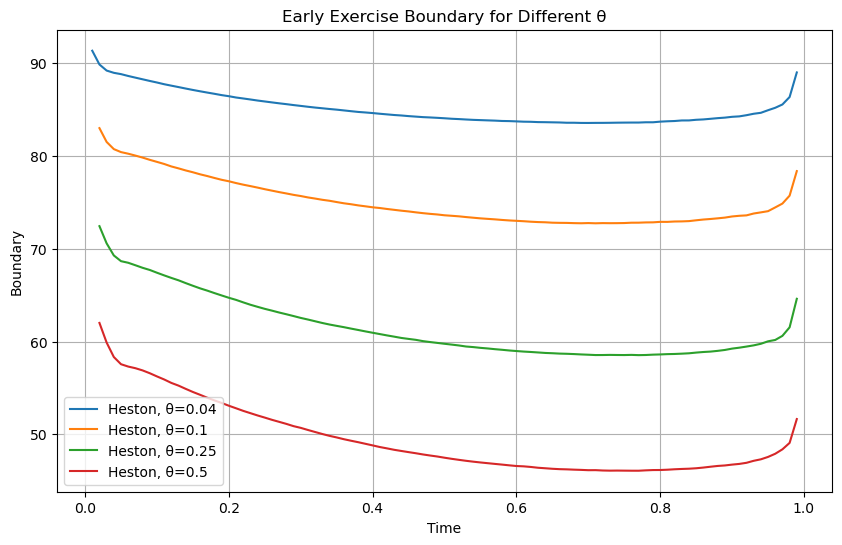

/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:52: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:52: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:52: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


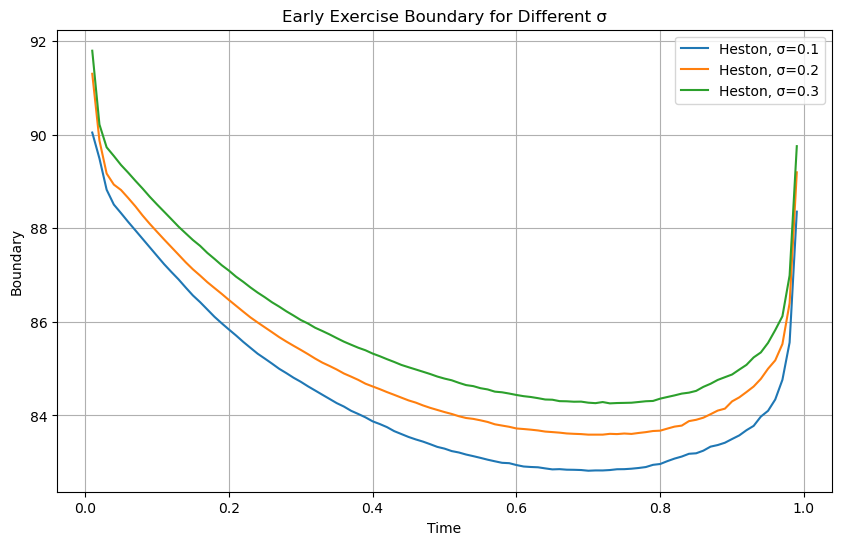

/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:69: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:69: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:69: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_42950/3801650252.py:69: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


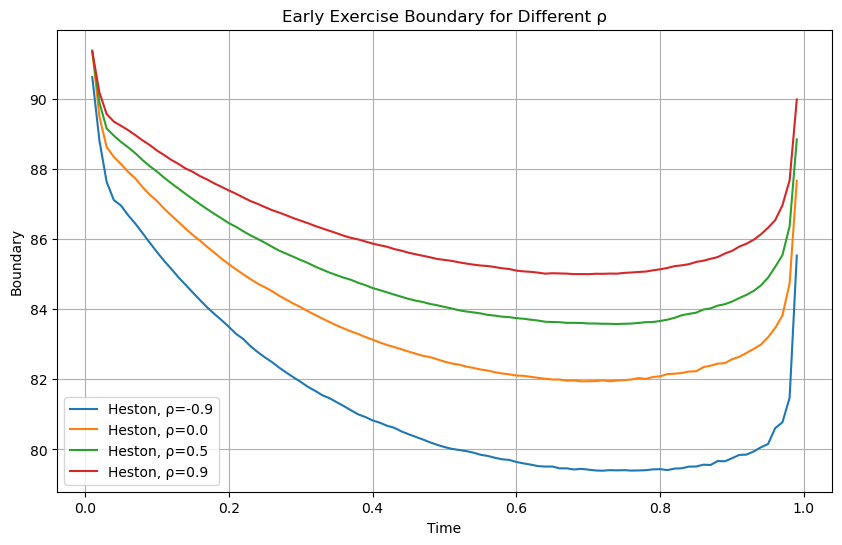

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Parameters 
np.random.seed(0)
S0 = 100
K = 100
T = 1
r = 0.05
kappa = 2.0
theta = 0.04
sigma = 0.2
rho = 0.5
v0 = 0.04
M = 100
N = 10000
num_simulations = 1000

# --- Loop over theta, sigma, S0, and rho ---
theta_values = [0.04, 0.1, 0.25, 0.5]
sigma_values = [0.1, 0.2, 0.3]
rho_values = [-0.9, 0.0, 0.5, 0.9]
time_grid = np.linspace(0, T, M + 1)

# --- Test: effect of theta ---
plt.figure(figsize=(10, 6))
for th in theta_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, th, kappa, th, sigma, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, θ={th}")
plt.title("Early Exercise Boundary for Different θ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of sigma ---
plt.figure(figsize=(10, 6))
for sig in sigma_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sig, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, σ={sig}")
plt.title("Early Exercise Boundary for Different σ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of rho ---
plt.figure(figsize=(10, 6))
for rh in rho_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rh, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, ρ={rh}")
plt.title("Early Exercise Boundary for Different ρ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Volatility Effects
def experiment_volatility_effects(param_name, param_values):
    prices, freqs = [], []
    for val in param_values:
        if param_name == "rho":
            S, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, val, T, M, N)
        elif param_name == "v0":
            S, _ = simulate_heston_paths(S0, val, kappa, theta, sigma, r, rho, T, M, N)
        elif param_name == "theta":
            S, _ = simulate_heston_paths(S0, v0, kappa, val, sigma, r, rho, T, M, N)
        else:
            continue
        price, freq = least_squares_monte_carlo(S, K, r, T, M)
        prices.append(price)
        freqs.append(freq * 100)
    return pd.DataFrame({param_name: param_values, "Price": prices, "Early Exercise %": freqs})

# Sensitivity ranges
rho_vals = np.linspace(-1, 1, 20)
v0_vals = np.linspace(0.01, 0.1, 20)
theta_vals = np.linspace(0.01, 0.1, 20)

df_rho = experiment_volatility_effects("rho", rho_vals)
df_v0 = experiment_volatility_effects("v0", v0_vals)
df_theta = experiment_volatility_effects("theta", theta_vals)

In [ ]:
# Combine for export
df_sensitivity = pd.concat([df_rho, df_v0, df_theta], keys=["rho", "v0", "theta"], names=["Parameter"])
print("\nSensitivity Analysis Summary:")
# print(df_sensitivity)

# Optional plot: Early Exercise vs rho
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(df_rho["rho"], df_rho["Early Exercise %"], marker='o')
plt.title("Early Exercise vs ρ")
plt.xlabel("ρ")
plt.ylabel("Early Exercise %")

plt.subplot(1, 3, 2)
plt.plot(df_v0["v0"], df_v0["Early Exercise %"], marker='o')
plt.title("Early Exercise vs v₀")
plt.xlabel("v₀")

plt.subplot(1, 3, 3)
plt.plot(df_theta["theta"], df_theta["Early Exercise %"], marker='o')
plt.title("Early Exercise vs θ")
plt.xlabel("θ")

plt.tight_layout()
plt.show()


In [ ]:
# 
